# Algorithms

In [1]:
# Selection Sort (with Linear Search) - Big-O(n^2)

def linear_search(arr):
  """
  Find the index of the minimum element AKA argsort
  """
  # initialize current best to +infinity
  # So any element beats it
  current_min = float('inf')
  current_min_idx = 0
  for i in range(len(arr)):
    if arr[i] < current_min:
      current_min = arr[i]
      current_min_idx = i
  return current_min_idx

def selection_sort(arr):
  """Selection sort"""
  n_sorted = 0
  while n_sorted < len(arr):
    # Get the index of the min of remaining elements
    # Since argsort returns based on array, we correct result
    # with `+ n_sorted`
    min_idx = linear_search(arr[n_sorted:]) + n_sorted
    # Swap minimum element with leftmost remaining element
    to_swap = arr[n_sorted]
    arr[n_sorted] = arr[min_idx]
    arr[min_idx] = to_swap
    # Increment and restart
    n_sorted += 1

In [2]:
arr = [111,4,3,22,5,44.4,66.6,777]
selection_sort(arr)
arr

[3, 4, 5, 22, 44.4, 66.6, 111, 777]

In [3]:
# Merge Sort - Big-O(n log(n))

def merge_sort(A): 
    size = len(A)
    if size > 1:
      m = size // 2
      left = merge_sort(A[m:]) 
      right = merge_sort(A[:m])
      return merge(left, right)
    else:
      return A

def merge(left, right):
  res = []
  # Zip in together left and right parts
  while len(left)>0 and len(right)>0: 
      if left[0]<right[0]: 
          res.append(left[0]) 
          left.pop(0)
      else: 
          res.append(right[0]) 
          right.pop(0)
  # Copy in remaining elements of left and right (if there are any)
  for i in left: 
      res.append(i) 
  for i in right: 
      res.append(i)
  return res

In [4]:
arr = [33, 1, 55, 2343, -232, 344, 2, 53, -4, 923]
arr = merge_sort(arr)
arr

[-232, -4, 1, 2, 33, 53, 55, 344, 923, 2343]

# Recursion

In [5]:
# Fibonacci exemple
def fib(n):
    # test for the base case (exit recursion)
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        # recall the function
        return fib(n-1) + fib(n-2)

In [6]:
fib(10)

55

# Knapsack

In [7]:
# Knapsack - Recursion

def knapsack_recursive(bag_size, weights, values, n_items):
    if n_items == 0 or bag_size == 0:  # base case
        return 0
    # if last item doesn't fit
    if weights[n_items-1] > bag_size:
        # Item can't be included
        return knapsack_recursive(bag_size, weights, values, n_items-1)
    # Otherwise, return the max of recursive solutions
    # Value of item not included
    left_side = knapsack_recursive(bag_size, weights, values, n_items-1)
    # Value of item being included
    right_side = (
        values[n_items-1] 
        + knapsack_recursive(bag_size - weights[n_items-1],
                             weights, values, n_items-1)
    )
    return max(left_side, right_side)

In [8]:
bag_size = 7
weights = [2, 3, 4, 5]
values = [3, 4, 5, 5]

knapsack_recursive(bag_size, weights, values, len(weights))

9

In [9]:
# Knapsack  - Dynamic programming

import numpy as np

def knapsack(M, n, m, v):
    d = [[0 for j in range(M+1)] for i in range(n+1)]
    # or d = np.zeros(M+1, n+1)
    
    # start considering 1, then 2, ... items; actual index of item is i-1
    for i in range(1, n+1):
        for j in range(M+1):
            # if item is heavier than current capacity
            if m[i-1] > j:
                # take the best value of previous choices 
                d[i][j] = d[i-1][j]
            else:
                # the best value of:
                d[i][j] = max(
                    # don't include item - take previous best
                    d[i-1][j],
                    # value of item + best value of previous items with lowered capacity 
                    v[i-1] + d[i-1][j-m[i-1]]
                )
    return d[n][M]

In [10]:
bag_size = 10
weights = [2, 3, 3, 4, 6]
values = [1, 2, 5, 9, 4]

knapsack(bag_size, len(weights), weights, values)

16

# Graphs

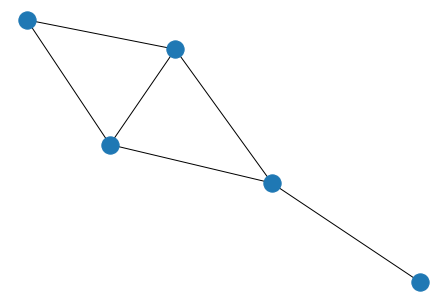

In [11]:
import networkx as nx

# Making a graph from edges list
G = nx.Graph([(1,2), (2,3), (3,4), (4,1)])
G.add_edge(2, 4)
G.add_node(5)
G.add_edge(5, 1)
nx.draw(G)

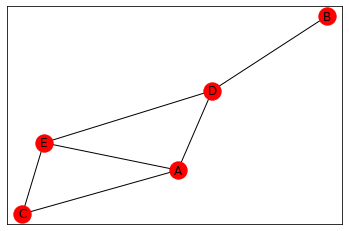

In [12]:
G = nx.Graph([('A','C'),('B','D'),('A','D'),('A','E'),('D','E'),('C','E')])
nx.draw_networkx(G, with_labels=True, node_color='r')

In [13]:
# Access egdes ans nodes
G.edges
# same with nodes
G.nodes

# or access graph as a matrix
import numpy as np
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 1, 1],
        [1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 1, 0]], dtype=int32)

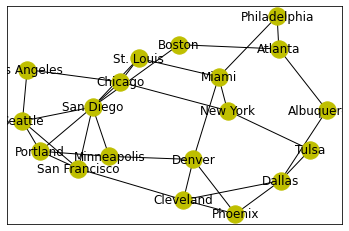

In [14]:
 G = nx.Graph([('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')])

nx.draw_networkx(G, with_labels=True, node_color='y')

In [15]:
print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

radius: 3
diameter: 5
eccentricity: {'St. Louis': 4, 'Miami': 3, 'San Diego': 3, 'Chicago': 4, 'San Francisco': 4, 'Minneapolis': 4, 'Boston': 4, 'Portland': 4, 'Seattle': 4, 'Tulsa': 4, 'New York': 3, 'Dallas': 4, 'Phoenix': 4, 'Cleveland': 3, 'Denver': 4, 'Los Angeles': 5, 'Philadelphia': 4, 'Atlanta': 4, 'Albuquerque': 5}
center: ['Miami', 'San Diego', 'New York', 'Cleveland']
periphery: ['Los Angeles', 'Albuquerque']
density: 0.1871345029239766


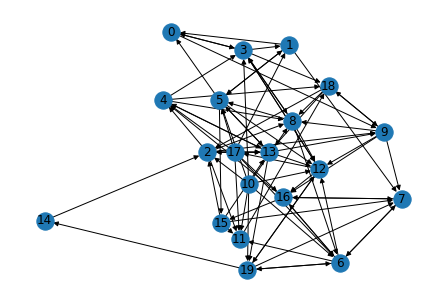

In [23]:
G = nx.binomial_graph(20, 0.2, directed=True)
nx.draw(G, with_labels=True)

In [26]:
nx.shortest_path(G, source=0, target=6, method='dijkstra') 

[0, 3, 8, 6]

# Fast Code

For reference, here is a handy chart of time taken on a normal x86 CPU to fetch data from different places:
```
Latency Comparison Numbers (~2012)
----------------------------------
L1 cache reference                           0.5 ns
Branch mispredict                            5   ns
L2 cache reference                           7   ns                      14x L1 cache
Mutex lock/unlock                           25   ns
Main memory reference                      100   ns                      20x L2 cache, 200x L1 cache
Compress 1K bytes with Zippy             3,000   ns        3 us
Send 1K bytes over 1 Gbps network       10,000   ns       10 us
Read 4K randomly from SSD*             150,000   ns      150 us          ~1GB/sec SSD
Read 1 MB sequentially from memory     250,000   ns      250 us
Round trip within same datacenter      500,000   ns      500 us
Read 1 MB sequentially from SSD*     1,000,000   ns    1,000 us    1 ms  ~1GB/sec SSD, 4X memory
Disk seek                           10,000,000   ns   10,000 us   10 ms  20x datacenter roundtrip
Read 1 MB sequentially from disk    20,000,000   ns   20,000 us   20 ms  80x memory, 20X SSD
Send packet CA->Netherlands->CA    150,000,000   ns  150,000 us  150 ms
```

In [18]:
from numba import jit

@jit(nopython=True)
def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
        x[t+1] = α * x[t] * (1 - x[t])
    return x

# We generally prefer to force an error (nopython=True) when the compilation is failing.
# Do not use global variables in a numba fonction.

In [19]:
# Multithreading
from numba import vectorize

@vectorize
def f_vec(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

grid = np.linspace(-3, 3, 5000)
x, y = np.meshgrid(grid, grid)
np.max(f_vec(x, y))  # Run once to compile
%timeit np.max(f_vec(x, y))


456 ms ± 77.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# Better multithreading
@vectorize('float64(float64, float64)', target='parallel')
def f_vec(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

np.max(f_vec(x, y))  # Run once to compile
%timeit np.max(f_vec(x, y))

775 ms ± 58.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
# Multithreading loops

@jit(nopython=True)
def compute_long_run_median_parallel(w0=1, T=1000, num_reps=50_000):

    obs = np.empty(num_reps)
    for i in numba.prange(num_reps): # use numba range
        w = w0
        for t in range(T): # independant task
            w = h(w)
        obs[i] = w

    return np.median(obs)

In [22]:
# also see joblib for parallel processing